<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [ ]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [ ]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [ ]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


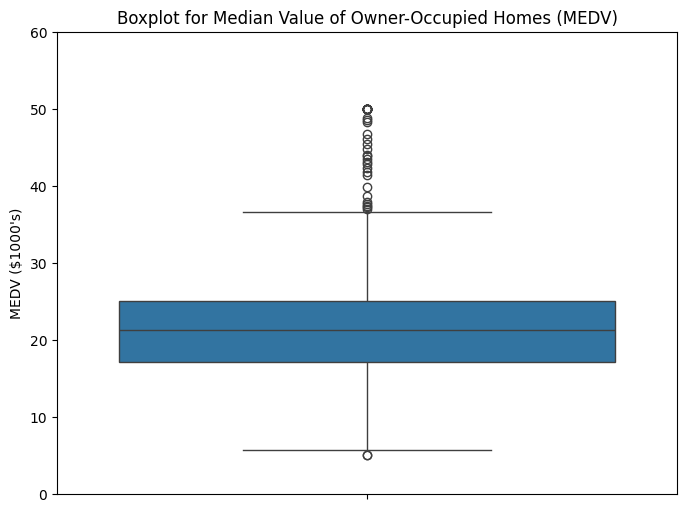

In [ ]:
# 1. Boxplot for "Median value of owner-occupied homes" (MEDV)
Q1 = boston_df['MEDV'].quantile(0.25)
Q3 = boston_df['MEDV'].quantile(0.75)
IQR = Q3 - Q1
outliers = boston_df[(boston_df['MEDV'] < (Q1 - 1.5 * IQR)) | (boston_df['MEDV'] > (Q3 + 1.5 * IQR))]

# Log-transform MEDV
boston_df['MEDV_log'] = np.log(boston_df['MEDV'] + 1)  # Add 1 to avoid log(0) issues

# Boxplot for original MEDV
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot for Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000\'s)')
plt.ylim(0, 60)  # Adjust based on your data range
plt.show()


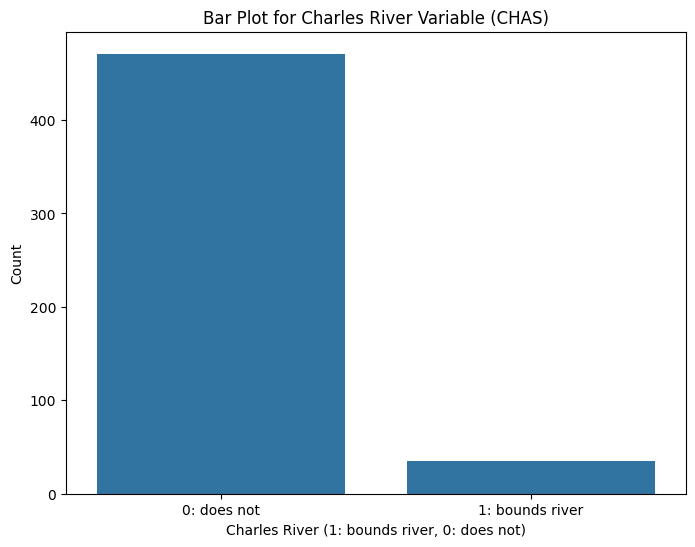

In [ ]:
# 2. Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot for Charles River Variable (CHAS)')
plt.xlabel('Charles River (1: bounds river, 0: does not)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['0: does not', '1: bounds river'])  # Ensure correct x-axis labels
plt.show()

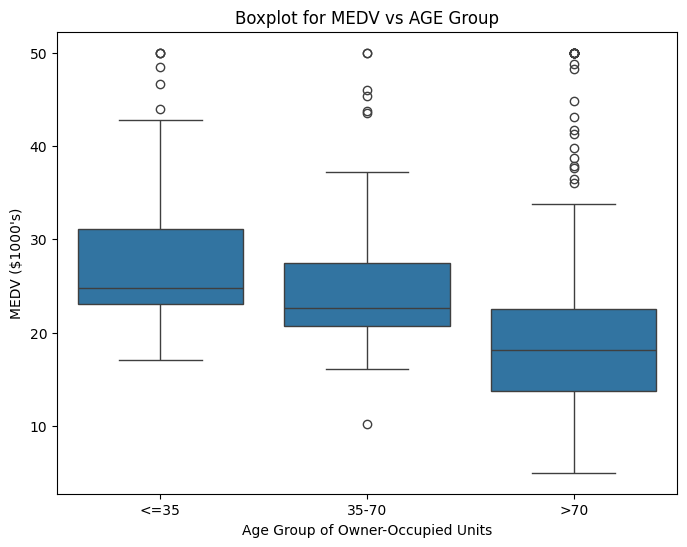

In [ ]:
# 3. Boxplot for MEDV vs AGE (discretized into three age groups)
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

# Boxplot for MEDV vs AGE Group
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot for MEDV vs AGE Group')
plt.xlabel('Age Group of Owner-Occupied Units')
plt.ylabel('MEDV ($1000\'s)')
plt.show()

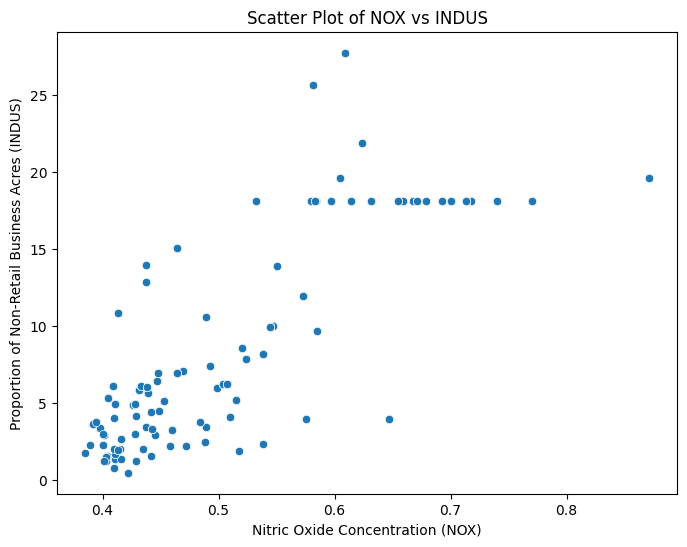

In [ ]:
# 4. Scatter plot to show the relationship between NOX and INDUS

plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

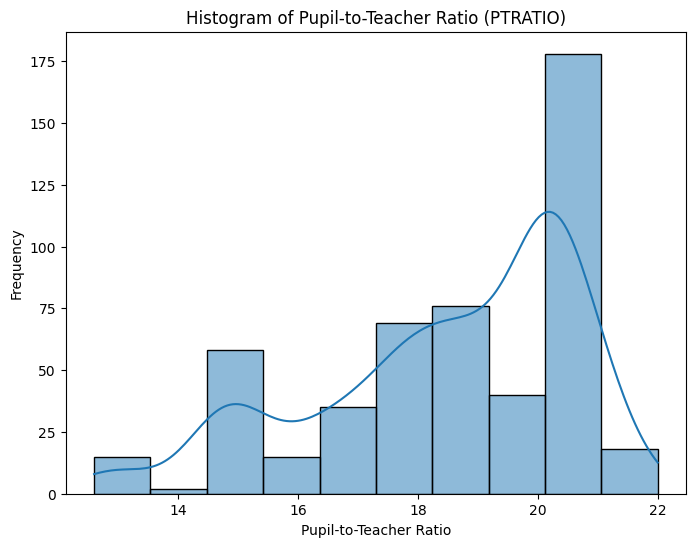

In [ ]:
# Histogram for the pupil-to-teacher ratio variable (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil-to-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Separate the data into two groups based on CHAS
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform the T-test
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's T-test for unequal variances

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in MEDV based on Charles River proximity.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in MEDV based on Charles River proximity.")

T-statistic: 3.113291312794837
P-value: 0.003567170098137517
Reject the null hypothesis: There is a significant difference in MEDV based on Charles River proximity.


In [ ]:
anova_result = f_oneway(
    boston_df[boston_df['AGE_group'] == '<=35']['MEDV'],
    boston_df[boston_df['AGE_group'] == '35-70']['MEDV'],
    boston_df[boston_df['AGE_group'] == '>70']['MEDV']
)

print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")

# Conclusion
if anova_result.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in MEDV across different age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in MEDV across different age groups.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in MEDV across different age groups.


In [ ]:
# Compute Pearson correlation
corr_coeff, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson correlation coefficient: {corr_coeff}")
print(f"P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between NOX and INDUS.")

Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


In [ ]:
# Prepare the data for regression
X = boston_df[['DIS']]
X = sm.add_constant(X)  # Add constant term for intercept
y = boston_df['MEDV']

# Perform regression analysis
model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
if model.pvalues['DIS'] < 0.05:
    print("Reject the null hypothesis: There is a significant impact of DIS on MEDV.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of DIS on MEDV.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        22:52:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0